## Application Dataset

In [1]:
# importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data into dataframes.
appltn_data = pd.read_csv('application_data.csv')

Loading data and getting the feel of the data

In [3]:
# previewing the application_data.
appltn_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# To check the number of rows and columns
appltn_data.shape 

(307511, 122)

The application_data has 307511 rows and 122 columns

In [5]:
# Lets check the count of different variables.

appltn_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

There are: <br>
65 float type columns <br>
41 int type columns <br>
16 object type columns <br>
<br>
Which makes 106 nuemeric variable and 16 categorical variables

In [6]:
# Lets get the count and number of unique values of each column.

appltn_data.agg(['count','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
nunique,307511,2,2,3,2,2,15,2548,5603,13672,...,2,2,2,2,5,9,9,24,11,25


## Data imbalance check

In [7]:
# Lets check for data imbalance. (Distribution of target data)

defaulters = appltn_data[appltn_data['TARGET'] == 1]
non_defaulters = appltn_data[appltn_data['TARGET']== 0]

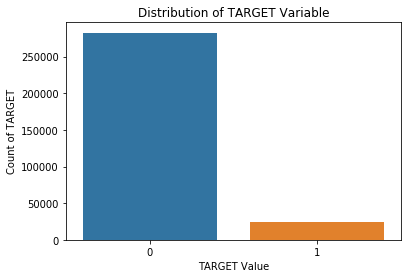

In [8]:
# plotting the distribution of target data.

'''
Here 
if TARGET == 1 (Then the person is a defaulter, which means they does not repay his loan in time)
if TARGET == 0 (Then the person is a non defaulter, which means they repay the loan in time)
'''
sns.countplot(appltn_data.TARGET)
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

<b>INFERENCE:</b> <br>
We see that this is a highly imbalanced dataset because there are far more loans that were repaid on time than the loans that were not repaid. <br>
More than 250000 loans were repaid whereas less than 50000 loans were not repaid.


In [9]:
percentage_defaulters = round((len(defaulters)*100)/len(appltn_data),2)
percentage_non_defaulters = round((len(non_defaulters)*100)/len(appltn_data),2)

print("The Percentage of people who have paid their loan is:",percentage_non_defaulters,"%")
print("The Percentage of people who have not paid their loan is:",percentage_defaulters,"%")
print("The Ratio of Data Imbalance is:",round(len(non_defaulters)/len(defaulters),2))

The Percentage of people who have paid their loan is: 91.93 %
The Percentage of people who have not paid their loan is: 8.07 %
The Ratio of Data Imbalance is: 11.39


## Data Cleaning

In [10]:
#Function to calculate info-data to identify % of data is missing in each column

'''
with the percentage of missing values we are also calculating 
Total number of missing values in each column
Number of unique values in the column
The data type of each column

'''
def info_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [11]:
app_info_data = info_data(appltn_data)
app_info_data

,Total,Percent,Unique,Data_Type
COMMONAREA_MEDI,214865,69.872297,3202,float64
COMMONAREA_AVG,214865,69.872297,3181,float64
COMMONAREA_MODE,214865,69.872297,3128,float64
NONLIVINGAPARTMENTS_MODE,213514,69.432963,167,float64
NONLIVINGAPARTMENTS_AVG,213514,69.432963,386,float64
NONLIVINGAPARTMENTS_MEDI,213514,69.432963,214,float64
FONDKAPREMONT_MODE,210295,68.386172,4,object
LIVINGAPARTMENTS_MODE,210199,68.354953,736,float64
LIVINGAPARTMENTS_AVG,210199,68.354953,1868,float64
LIVINGAPARTMENTS_MEDI,210199,68.354953,1097,float64


In [12]:
'''
Dropping columns with high missing value.
Selecting to drop columns which have missing value percentage above 57% and dropping them 
Im selecting 57% because i want to keep the column EXT_SSOURCE_1 for further Analysis
'''
cols_to_keep=list(app_info_data[(app_info_data.Percent<57)].index)
appltn_data=appltn_data[cols_to_keep]
appltn_data.describe()

,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,...,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
count,134133.000000,137829.000000,137829.000000,137829.000000,143620.000000,143620.000000,143620.000000,151450.000000,151450.00000,151450.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.502130,0.027022,0.028358,0.028236,0.078078,0.078942,0.074490,0.117850,0.11744,0.114231,...,0.998133,0.199368,0.819889,0.999997,-2994.202373,-4986.120328,63815.045904,-16036.995067,0.020868,278180.518577
std,0.211062,0.070254,0.069523,0.070166,0.134467,0.134576,0.132256,0.109076,0.10824,0.107936,...,0.043164,0.399526,0.384280,0.001803,1509.450419,3522.886321,141275.766519,4363.988632,0.013831,102790.175348
min,0.014568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-7197.000000,-24672.000000,-17912.000000,-25229.000000,0.000290,100002.000000
25%,0.334007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058300,0.05770,0.052500,...,1.000000,0.000000,1.000000,1.000000,-4299.000000,-7479.500000,-2760.000000,-19682.000000,0.010006,189145.500000
50%,0.505998,0.001100,0.003600,0.003100,0.000000,0.000000,0.000000,0.086400,0.08760,0.084000,...,1.000000,0.000000,1.000000,1.000000,-3254.000000,-4504.000000,-1213.000000,-15750.000000,0.018850,278202.000000
75%,0.675053,0.023100,0.027700,0.026600,0.120000,0.120000,0.120800,0.148900,0.14850,0.143900,...,1.000000,0.000000,1.000000,1.000000,-1720.000000,-2010.000000,-289.000000,-12413.000000,0.028663,367142.500000
max,0.962693,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,365243.000000,-7489.000000,0.072508,456255.000000


In [13]:
'''
Checking columns with very less missing values
that is columns having missing value between 0 and 15.
'''
low_missing_data=pd.DataFrame(app_info_data[(app_info_data.Percent>0)&(app_info_data.Percent<15)])
low_missing_data

,Total,Percent,Unique,Data_Type
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631,5,float64
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631,9,float64
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631,9,float64
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631,24,float64
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631,11,float64
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631,25,float64
NAME_TYPE_SUITE,1292,0.420148,7,object
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021,10,float64
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64


#### **Explanation for treatment of columns with low missing values**

1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR

**We can impute missing values in above columns above with 0s and assume that no enquiry was made during the time reflected in null rows.**


1. NAME_TYPE_SUITE - we should leave empty values as it is or impute it with "Others A" or "Others B" depending on what they mean.
2. OBS_30_CNT_SOCIAL_CIRCLE & related fields. 
3. EXT_SOURCE_2 
4. AMT_GOODS_PRICE 
5. CNT_FAM_MEMBERS
6. AMT_ANNUITY
7. DAYS_LAST_PHONE_CHANGE


**We should not add any additional info in missing values of these columns above 
because first of all they have very less missing values close to none and would lead to unecesary noise into the dataset**


**Lets have a look at all the columns of differnt data types**



In [14]:
appltn_data.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

In [15]:
appltn_data.select_dtypes('float64').columns

Index(['EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTA

In [16]:
appltn_data.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
       'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'],
      dtype='object')

In [17]:
'''
we see that a lot of integer columns are flag columns which will have very less unique values and we can basically 
convert them into categorical variables like Y/N. 
'''

# Lets check the unique values of int columns and read it into a pandas series.
appltn_data.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

CNT_CHILDREN                       15
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_12                    2
FLAG_PHONE                          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
TARGET                              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_

In [18]:
'''
lets convert this columns to categirical value (from 0/1 tp N/Y)
'''
# columns to convert to categorical value is stored in a list
cols_to_convert=list(app_info_data[(app_info_data.Unique==2)&(app_info_data.Data_Type=="int64")].index)

#function to convert columns from int64 to object.
def convert_data(appltn_data, cols_to_convert):
    for y in cols_to_convert:
        appltn_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return appltn_data

#calling the function for application_data
convert_data(appltn_data, cols_to_convert)

# converting the target column back to original
appltn_data.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)
appltn_data.dtypes.value_counts()

object     47
float64    43
int64       9
dtype: int64

We see that our categorical value count has increased to 45 and our nuemeric value count has decreased

## <font color=brown>Univariate Analyis on Categorical Columns</font>

In [19]:
''' 
we again set the data of defaulters and non defaulters aside so that we can analyse each column on the basis of 
defaulters and non defaulters in each case
'''
defaulters = appltn_data[appltn_data.TARGET==1]
non_defaulters = appltn_data[appltn_data.TARGET==0]


In [20]:
# we will be performing univariate analysis on categorical columns so lets see all the catagorical columns.
appltn_data.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'FLAG_DOCUMENT_8',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_LIVE_REGION', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'ORGANIZATION_TYPE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'NAME_HOUS

In [21]:
# function to plot charts for univariate analysis..

def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=non_defaulters[var], data=non_defaulters, order= non_defaulters[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()

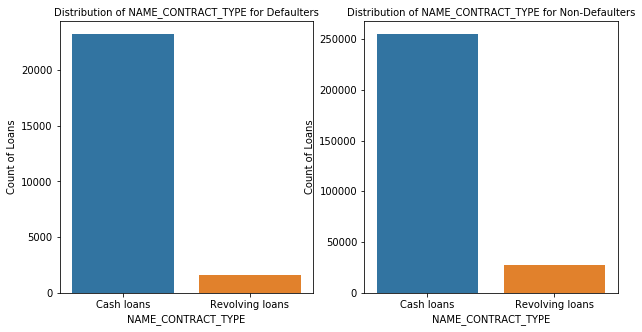

In [22]:
# first lets see for both targets what is the commom method of taking the loans.

plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

**Analysis:** <br> 
Hence we see for both the targets the cash loans is much higher than Revolving Loans

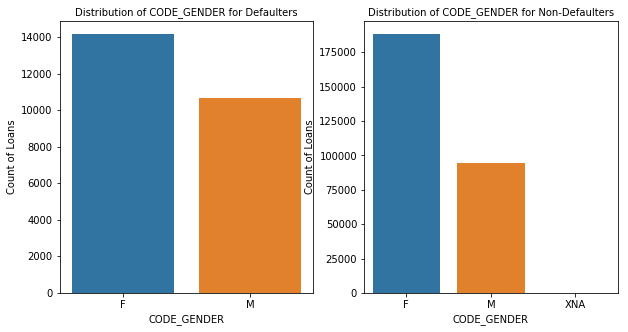

In [23]:
# if we take gender into consideration:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)

**Analysis:** <br> 
We see that for both Targets Females are taking more loans than Males

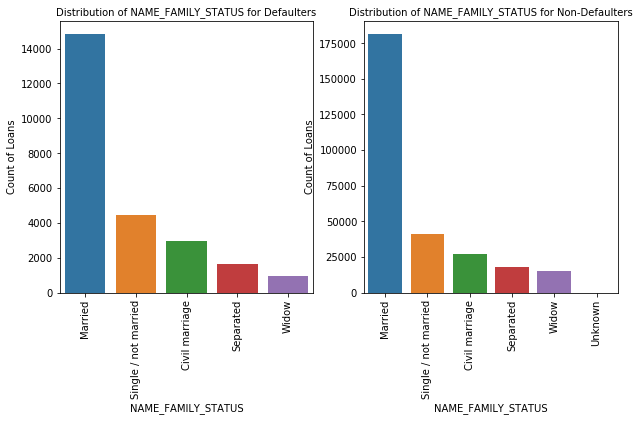

In [24]:
# Lets see how family status affect our analtsis..
plot_charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

**Analysis:** <br> 
We see most of the people that are taking loans are Married.
Single or unmarried people have more difficulty in paying their loans

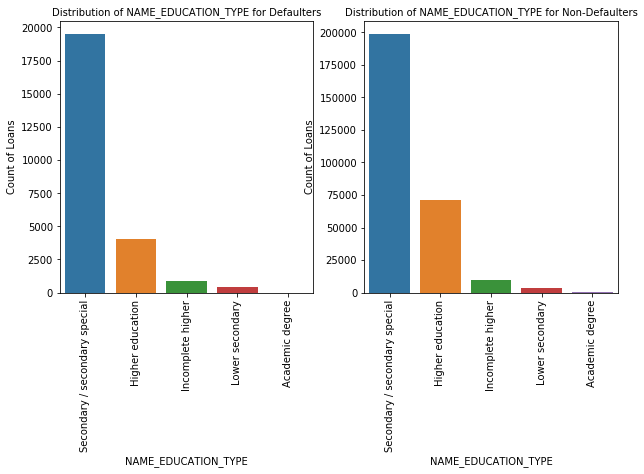

In [25]:
# Lets see if education. type effects our analysis:

plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

**Analysis:** <br> 
We see that people with Academic degree rarely take loans and if they take it is all repaid.<br>
Hence potential customers. <br>
The ratio of loan count for higher education is also more for non defaulters. so even the higher education has no difficulty.<br>

## <font color=brown>Analyis on Numeric Columns</font>

In [26]:
appltn_data.select_dtypes('float64').columns

Index(['EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTA

In [27]:
appltn_data.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'TARGET', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'],
      dtype='object')

### <font color=brown>Removing Outliers</font>

In [28]:
# function to plot box plot and Histogram..

def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
plt.show()

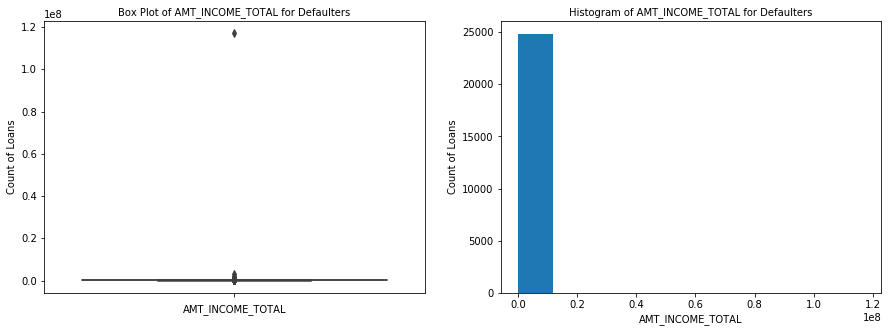

In [29]:
'''
lets look at the Income of people and check how this affects our Analysis.
'''
plot_boxhist('AMT_INCOME_TOTAL')

Cleary this graph has outliers hence it is presented this way

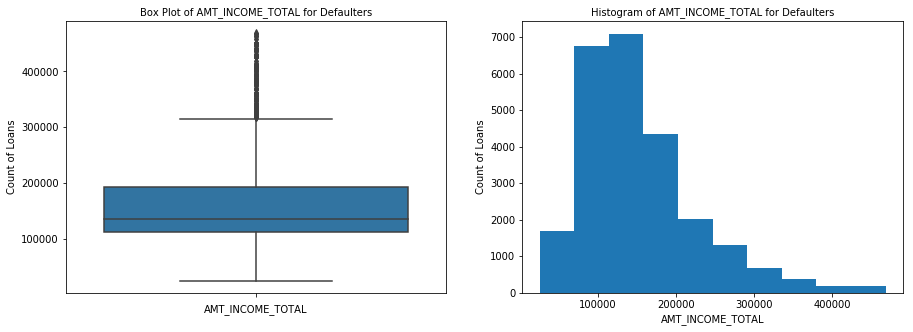

In [30]:

# Removing all entries above 99 percentile
appltn_data=appltn_data[appltn_data.AMT_INCOME_TOTAL<np.nanpercentile(appltn_data['AMT_INCOME_TOTAL'], 99)]

# updating the dataframes
defaulters=appltn_data[appltn_data.TARGET==1] 
nondefaulters=appltn_data[appltn_data.TARGET==0]

plot_boxhist('AMT_INCOME_TOTAL')

**Analysis:** <br> 

There were outliers in this data column because income of few people can be considerably high or considerably low<br>
So we need to remove those outliers to see the actual spread of data <br>
and where the majority income bracket lies

This tells us that most people who take loans are in the range of 100000 to 200000. <br>
Number of loans taken are very less outside this spread of value

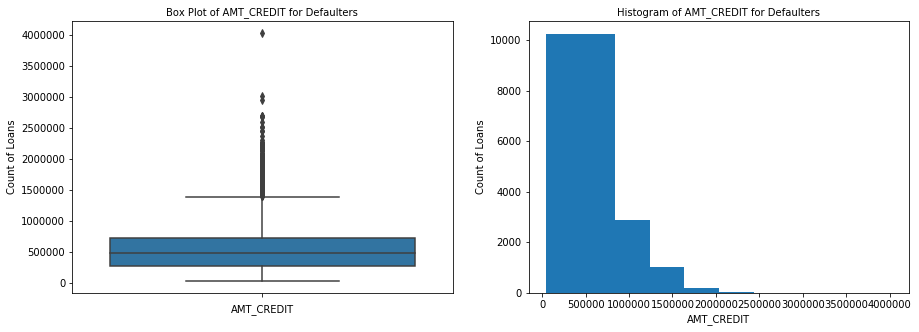

In [31]:
'''
lets look at the the amount credidted for people and check the spread of data.
'''
plot_boxhist('AMT_CREDIT')

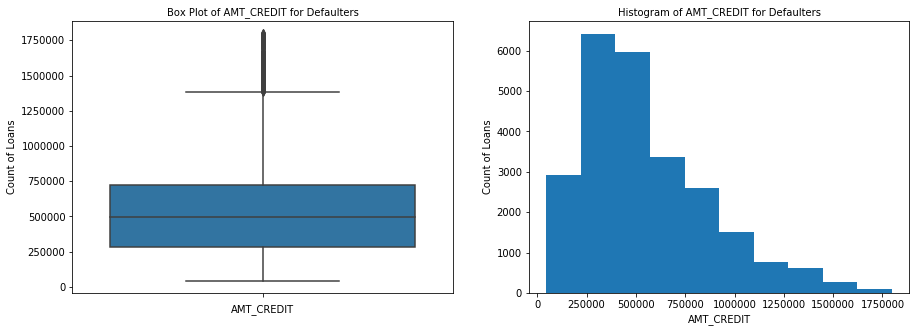

In [32]:
# Removing all entries above 99 percentile
appltn_data=appltn_data[appltn_data.AMT_CREDIT<np.nanpercentile(appltn_data['AMT_CREDIT'], 99)]

# updating the dataframes
defaulters=appltn_data[appltn_data.TARGET==1] 
nondefaulters=appltn_data[appltn_data.TARGET==0]

plot_boxhist('AMT_CREDIT')

**Analysis:** <br> 
We see that the Amount credited lies in the range of 250000 and 750000

## <font color=brown>Binning on Continuos Variable</font>

In [33]:
# Taking the income column..

appltn_data['AMT_INCOME_TOTAL'].describe()

count    300716.000000
mean     161543.701719
std       76329.355440
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      468823.500000
Name: AMT_INCOME_TOTAL, dtype: float64

In [34]:
# Creating bins of income bracket and specifying ceratin labels to them 

defaulters.loc[:,'INCOME_BRACKET'] = pd.qcut(appltn_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
non_defaulters.loc[:,'INCOME_BRACKET'] = pd.qcut(appltn_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])


/Users/solon_das96/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/solon_das96/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### <font color=brown>Analysis on Continuous variables for both TARGETS</font>

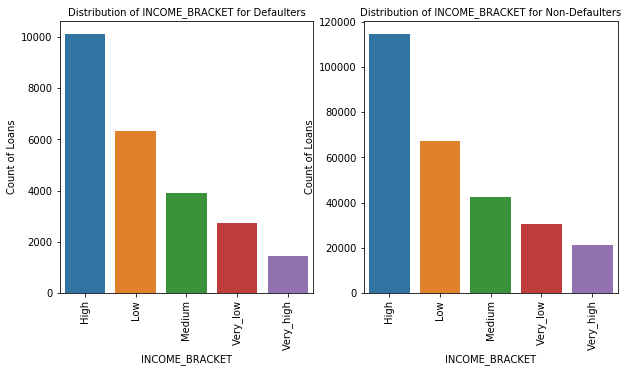

In [35]:
plot_charts('INCOME_BRACKET', label_rotation=True,horizontal_layout=True)

In [39]:
# checking the Annuity amount column
appltn_data['AMT_ANNUITY'].describe()

count    300704.000000
mean      26412.249589
std       13431.044217
min        1615.500000
25%       16389.000000
50%       24588.000000
75%       33750.000000
max      160686.000000
Name: AMT_ANNUITY, dtype: float64

In [41]:
# Creating bin on amount of annuity.. 

defaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(appltn_data.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,0.1], labels=['Low','Medium','High','Very_High'])
non_defaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(appltn_data.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,1], labels=['Low','Medium','High','Very_High'])

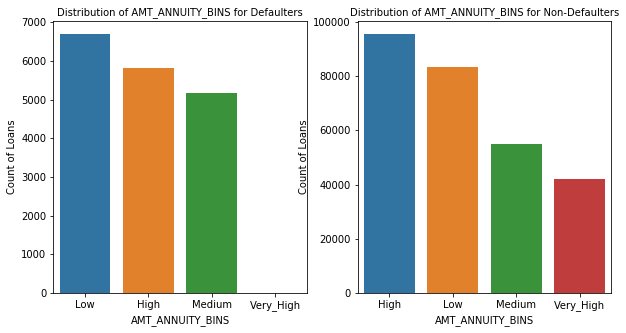

In [42]:
plot_charts('AMT_ANNUITY_BINS', label_rotation=False,horizontal_layout=True)

**Analysis:**<br>
Maximum number of defaulters have Low_annuity Values, while maximum number of non-defaulters have high annuity**

## <font color=Navy> Bi-Variate Analysis</font>

In [44]:
# selecting columns for correlation, removing cols for floor and house etc

cols=['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE','CNT_CHILDREN', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

In [45]:
'''
Taking the defaulter columns and checking correlation among each other.
'''
defaulters_1=defaulters[cols]
defaulters_correlation = defaulters_1.corr()
round(defaulters_correlation, 3)

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
EXT_SOURCE_1,1.000,0.141,0.169,0.180,0.093,-0.052,-0.129,0.172,0.073,-0.162,0.079,-0.091,0.014,-0.062,-0.064,-0.117,0.281,-0.571
EXT_SOURCE_3,0.141,1.000,0.079,0.087,0.046,-0.021,-0.067,0.085,-0.064,-0.086,-0.007,-0.021,-0.045,0.005,0.008,-0.129,0.094,-0.173
EXT_SOURCE_2,0.169,0.079,1.000,0.125,0.108,0.002,-0.208,0.114,0.137,-0.071,0.167,-0.012,0.134,-0.245,-0.247,-0.060,-0.000,-0.108
AMT_GOODS_PRICE,0.180,0.087,0.125,1.000,0.738,0.051,-0.118,0.981,0.335,-0.030,0.075,-0.005,0.041,-0.071,-0.061,-0.056,0.009,-0.136
AMT_ANNUITY,0.093,0.046,0.108,0.738,1.000,0.077,-0.075,0.737,0.416,0.033,0.066,0.034,0.028,-0.082,-0.067,-0.014,-0.083,-0.008
CNT_FAM_MEMBERS,-0.052,-0.021,0.002,0.051,0.077,1.000,-0.015,0.055,0.006,0.146,-0.031,0.885,-0.027,0.049,0.045,-0.030,-0.188,0.204
DAYS_LAST_PHONE_CHANGE,-0.129,-0.067,-0.208,-0.118,-0.075,-0.015,1.000,-0.109,-0.084,0.070,-0.055,0.010,-0.022,0.018,0.017,0.125,0.004,0.110
AMT_CREDIT,0.172,0.085,0.114,0.981,0.737,0.055,-0.109,1.000,0.333,-0.030,0.067,0.002,0.028,-0.065,-0.053,-0.052,0.004,-0.135
AMT_INCOME_TOTAL,0.073,-0.064,0.137,0.335,0.416,0.006,-0.084,0.333,1.000,0.036,0.111,-0.001,0.079,-0.178,-0.163,-0.002,-0.119,0.005
DAYS_REGISTRATION,-0.162,-0.086,-0.071,-0.030,0.033,0.146,0.070,-0.030,0.036,1.000,-0.056,0.149,-0.033,0.101,0.105,0.097,-0.189,0.289


In [46]:
# coloumns in defaulter df

defaulters_correlation.head(10).index

Index(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION'],
      dtype='object')

In [47]:
# soting the correlation in descending order

c1=defaulters_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

DAYS_BIRTH                   DAYS_BIRTH              1.000000
AMT_GOODS_PRICE              AMT_CREDIT              0.981180
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT    0.957113
CNT_CHILDREN                 CNT_FAM_MEMBERS         0.885225
AMT_ANNUITY                  AMT_GOODS_PRICE         0.738148
AMT_CREDIT                   AMT_ANNUITY             0.737241
AMT_ANNUITY                  AMT_INCOME_TOTAL        0.415759
AMT_GOODS_PRICE              AMT_INCOME_TOTAL        0.334825
AMT_CREDIT                   AMT_INCOME_TOTAL        0.333194
DAYS_BIRTH                   DAYS_REGISTRATION       0.289347
dtype: float64

In [48]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_LAST_PHONE_CHANGE       EXT_SOURCE_2                  -0.207604
DAYS_EMPLOYED                DAYS_ID_PUBLISH               -0.227258
REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2                  -0.245484
EXT_SOURCE_2                 REGION_RATING_CLIENT          -0.247166
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT_W_CITY   -0.276026
                             REGION_RATING_CLIENT          -0.293776
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT          -0.438534
                             REGION_RATING_CLIENT_W_CITY   -0.442488
EXT_SOURCE_1                 DAYS_BIRTH                    -0.571248
DAYS_BIRTH                   DAYS_EMPLOYED                 -0.577619
dtype: float64

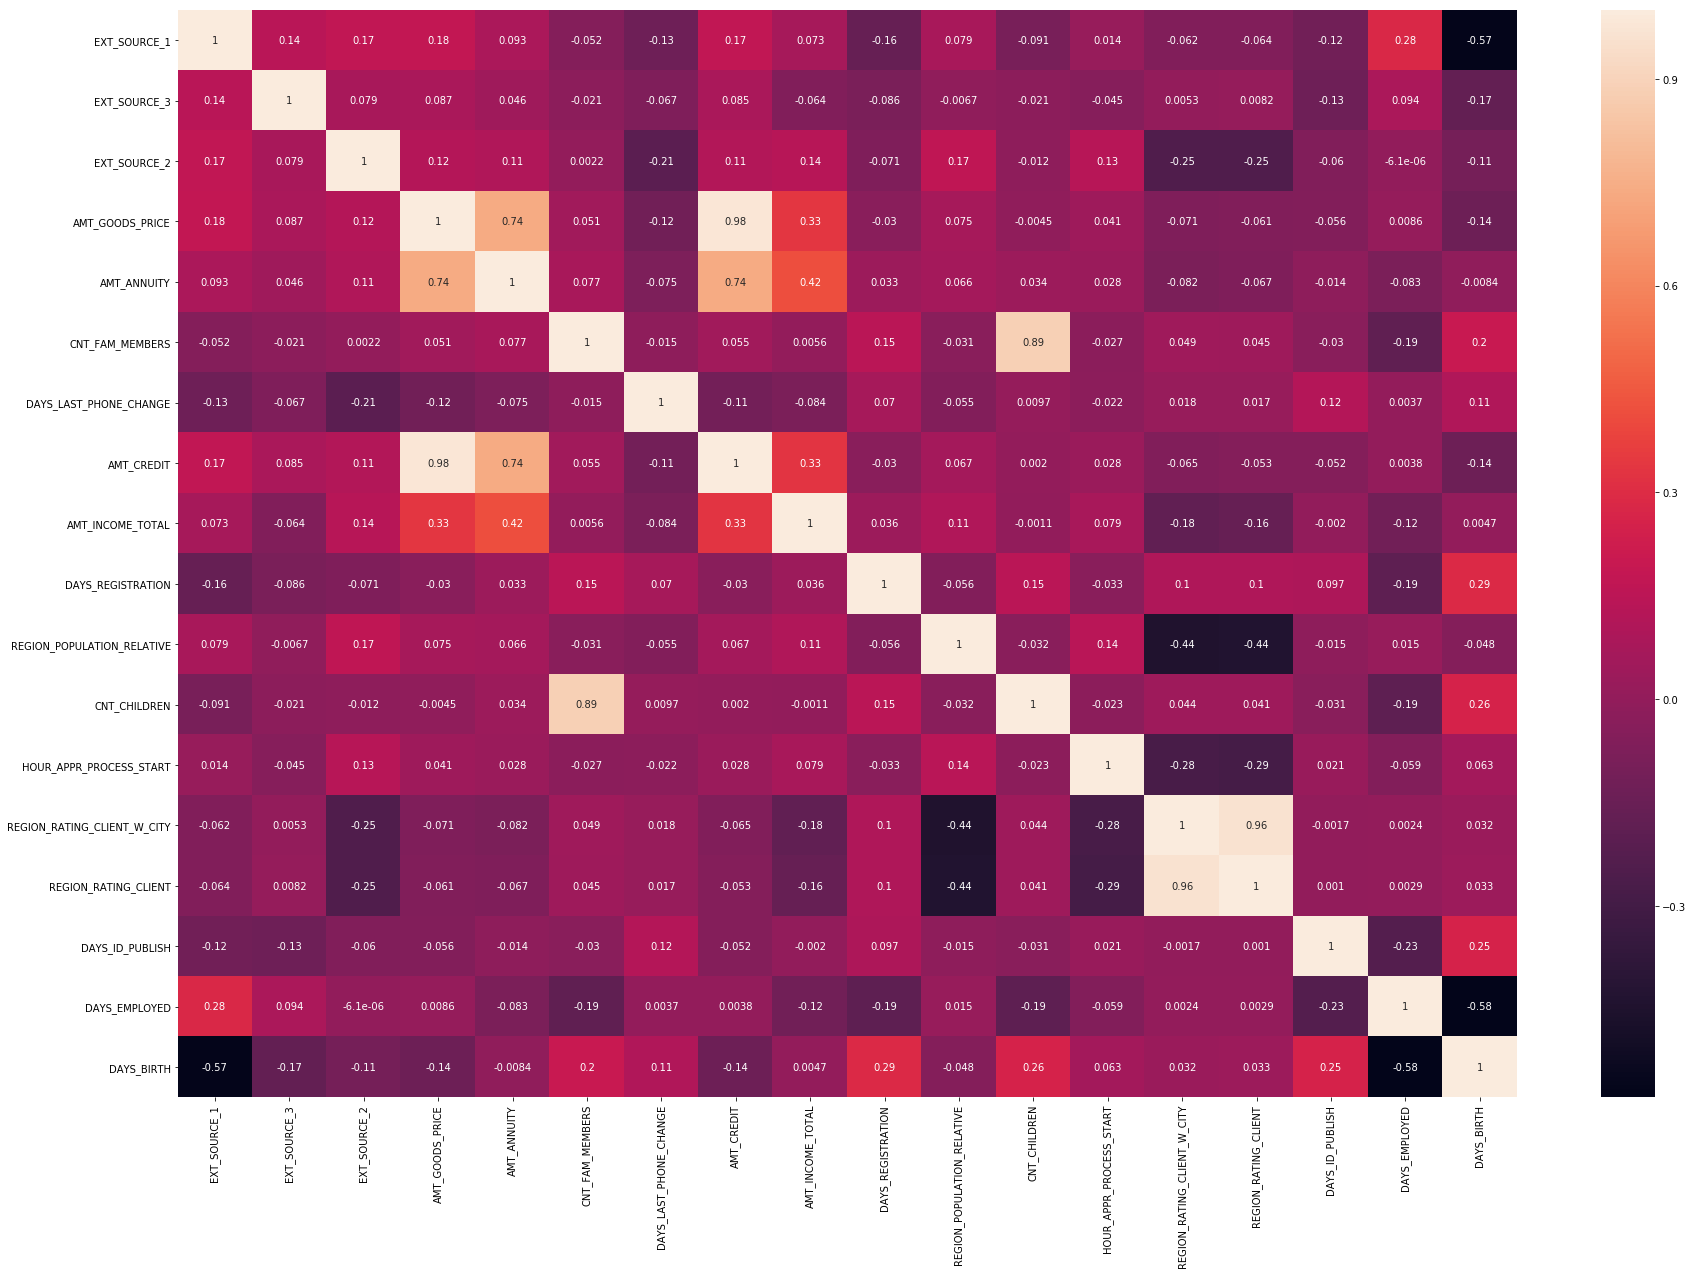

In [59]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(defaulters_correlation, annot=True)
plt.show()

#### 5 most positive correlations
1. AMT_CREDIT - AMT_GOODS_PRICE
2. REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT
3. CNT_CHILDREN - CNT_FAM_MEMBERS
4. AMT_CREDIT - AMT_ANNUITY
5. AMT_GOODS_PRICE - AMT_ANNUITY

#### 5 most negative correlations
1. HOUR_APPR_PROCESS_START - REGION_RATING_CLIENT_W_CITY
2. REGION_RATING_CLIENT - HOUR_APPR_PROCESS_START
3. REGION_POPULATION_RELATIVE - REGION_RATING_CLIENT
4. REGION_RATING_CLIENT_W_CITY - REGION_POPULATION_RELATIVE
5. EXT_SOURCE_1 - DAYS_BIRTH

In [50]:
'''
Now lets check for the non_defaulters.
'''
nondefaulters_1=nondefaulters[cols]
nondefaulters_correlation = nondefaulters_1.corr()
round(nondefaulters_correlation, 3)

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
EXT_SOURCE_1,1.000,0.169,0.195,0.161,0.104,-0.102,-0.128,0.154,0.073,-0.182,0.089,-0.142,0.027,-0.104,-0.104,-0.131,0.295,-0.603
EXT_SOURCE_3,0.169,1.000,0.085,0.036,0.025,-0.028,-0.069,0.033,-0.088,-0.104,-0.010,-0.042,-0.044,-0.005,-0.006,-0.125,0.109,-0.199
EXT_SOURCE_2,0.195,0.085,1.000,0.122,0.113,-0.002,-0.190,0.115,0.160,-0.054,0.192,-0.016,0.155,-0.281,-0.286,-0.042,-0.028,-0.079
AMT_GOODS_PRICE,0.161,0.036,0.122,1.000,0.760,0.064,-0.081,0.985,0.378,0.010,0.082,-0.001,0.056,-0.089,-0.081,-0.003,-0.068,-0.047
AMT_ANNUITY,0.104,0.025,0.113,0.760,1.000,0.077,-0.067,0.755,0.456,0.036,0.100,0.022,0.046,-0.126,-0.113,0.016,-0.107,0.016
CNT_FAM_MEMBERS,-0.102,-0.028,-0.002,0.064,0.077,1.000,-0.029,0.065,0.037,0.177,-0.025,0.878,-0.011,0.030,0.029,-0.019,-0.239,0.287
DAYS_LAST_PHONE_CHANGE,-0.128,-0.069,-0.190,-0.081,-0.067,-0.029,1.000,-0.078,-0.061,0.053,-0.043,-0.009,-0.014,0.024,0.024,0.085,0.027,0.076
AMT_CREDIT,0.154,0.033,0.115,0.985,0.755,0.065,-0.078,1.000,0.373,0.007,0.078,0.003,0.046,-0.088,-0.080,-0.001,-0.069,-0.050
AMT_INCOME_TOTAL,0.073,-0.088,0.160,0.378,0.456,0.037,-0.061,0.373,1.000,0.076,0.176,0.031,0.088,-0.228,-0.210,0.031,-0.178,0.085
DAYS_REGISTRATION,-0.182,-0.104,-0.054,0.010,0.036,0.177,0.053,0.007,0.076,1.000,-0.053,0.187,-0.008,0.072,0.078,0.101,-0.211,0.334


In [51]:
nondefaulters_correlation.head(10).index

Index(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION'],
      dtype='object')

In [52]:
c2=nondefaulters_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)

DAYS_BIRTH            DAYS_BIRTH                     1.000000
AMT_CREDIT            AMT_GOODS_PRICE                0.985147
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.949843
CNT_FAM_MEMBERS       CNT_CHILDREN                   0.878121
AMT_GOODS_PRICE       AMT_ANNUITY                    0.759571
AMT_ANNUITY           AMT_CREDIT                     0.754542
AMT_INCOME_TOTAL      AMT_ANNUITY                    0.456136
                      AMT_GOODS_PRICE                0.378106
                      AMT_CREDIT                     0.373100
DAYS_BIRTH            CNT_CHILDREN                   0.338056
dtype: float64

In [53]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

CNT_CHILDREN                 DAYS_EMPLOYED                 -0.245061
REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START       -0.259978
DAYS_EMPLOYED                DAYS_ID_PUBLISH               -0.277228
REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2                  -0.280694
REGION_RATING_CLIENT         HOUR_APPR_PROCESS_START       -0.281162
EXT_SOURCE_2                 REGION_RATING_CLIENT          -0.285941
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY   -0.526713
                             REGION_RATING_CLIENT          -0.527970
EXT_SOURCE_1                 DAYS_BIRTH                    -0.603038
DAYS_BIRTH                   DAYS_EMPLOYED                 -0.621446
dtype: float64

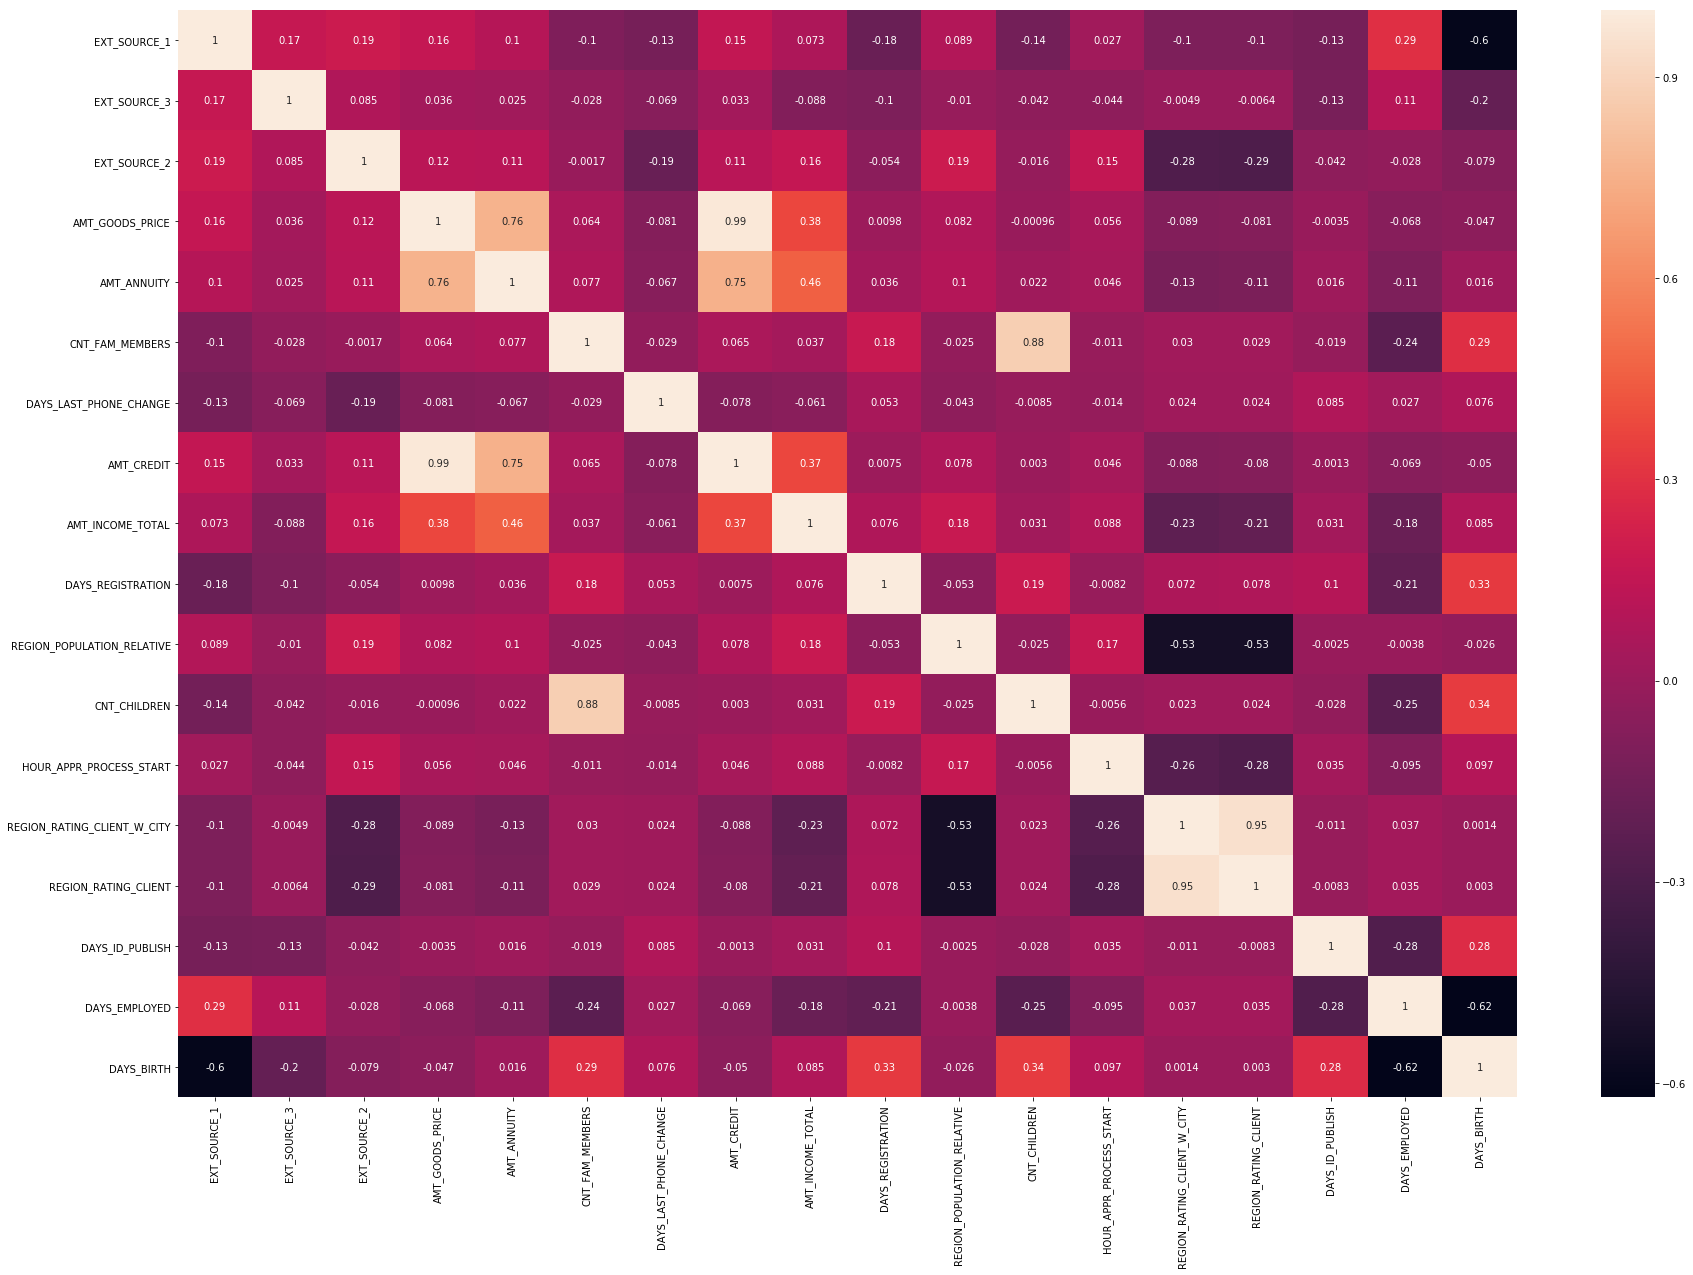

In [62]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(nondefaulters_correlation, annot=True)
plt.show()

#### 5 most positive correlations
1. AMT_CREDIT - AMT_GOODS_PRICE
2. REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT
3. CNT_CHILDREN - CNT_FAM_MEMBERS
4. AMT_GOODS_PRICE - AMT_ANNUITY
5. AMT_ANNUITY - AMT_CREDIT